In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
# loading the csv data to a Pandas DataFrame
KA_data = pd.read_csv('Data/Victims of KA/VICTIMS_OF_KA_0.csv')

In [10]:
# Making new column for Total with adding all from column 5 to end
# KA_data['Total'] = KA_data.iloc[:, 5:].sum(axis=1)
# Make the spatial datas column State/ut all capital
KA_data['STATE/UT'] = KA_data['STATE/UT'].str.title()
# Make the state/ut column all capital
KA_data['STATE/UT'] = KA_data['STATE/UT'].str.upper()

In [11]:
# find the unique values in the 'STATE/UT' column which start from the letter 'T'
unique_states = KA_data['STATE/UT'].unique()

# filter the unique values that start with the letter 'T'
t_states = [state for state in unique_states if state.startswith('TO')]

# print the filtered unique values  
print(t_states)

# drop the rows where the 'STATE/UT' column starts with the letter 'T'
KA_data = KA_data[~KA_data['STATE/UT'].isin(t_states)]
unique_states = KA_data['STATE/UT'].unique()
# print(unique_states)

# drop TOTAL (STATES) row
KA_data = KA_data[KA_data['STATE/UT'] != 'TOTAL (STATES)']
KA_data = KA_data[KA_data['STATE/UT'] != 'TOTAL (UTs)']
KA_data = KA_data[KA_data['STATE/UT'] != 'TOTAL (ALL)']
KA_data = KA_data[KA_data['STATE/UT'] != 'TOTAL (ALL-INDIA)']
unique_states = KA_data['STATE/UT'].unique()
print(unique_states)


[]
['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A&N ISLANDS'
 'CHANDIGARH' 'D&N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'LAKSHADWEEP'
 'PUDUCHERRY']


In [13]:
# Processing the data adding all the values in the Victims_Total column and grouping by year
year_wise = KA_data.groupby('YEAR')['Grand Total'].sum()
state_wise = KA_data.groupby('STATE/UT')['Grand Total'].sum().sort_values()
state_wise_other = state_wise.sort_values(ascending=False)
others = state_wise_other[state_wise_other/state_wise_other.sum() < 0.025].sum()
state_wise_other = state_wise_other[state_wise_other/state_wise_other.sum() >= 0.025]
state_wise_other['Others'] = others

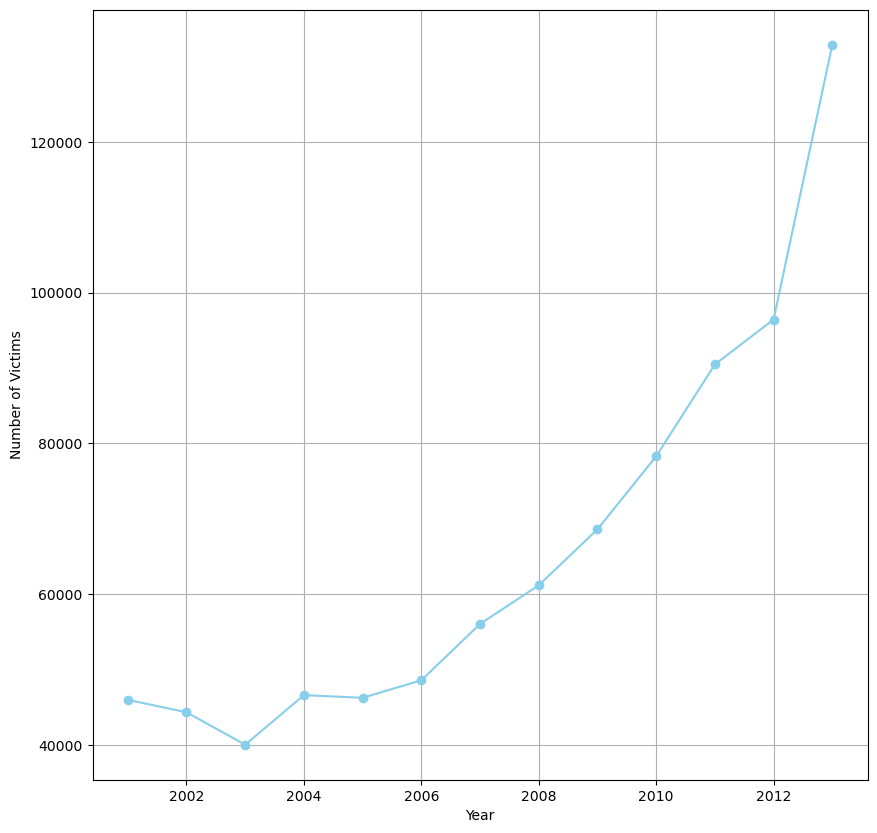

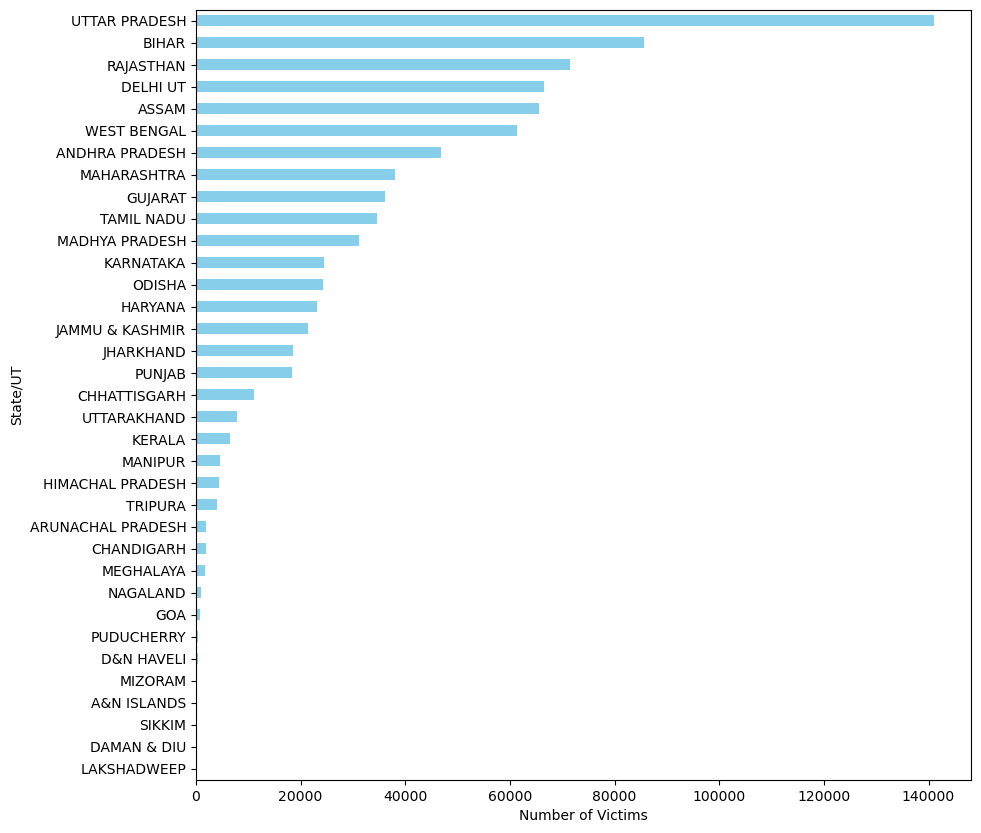

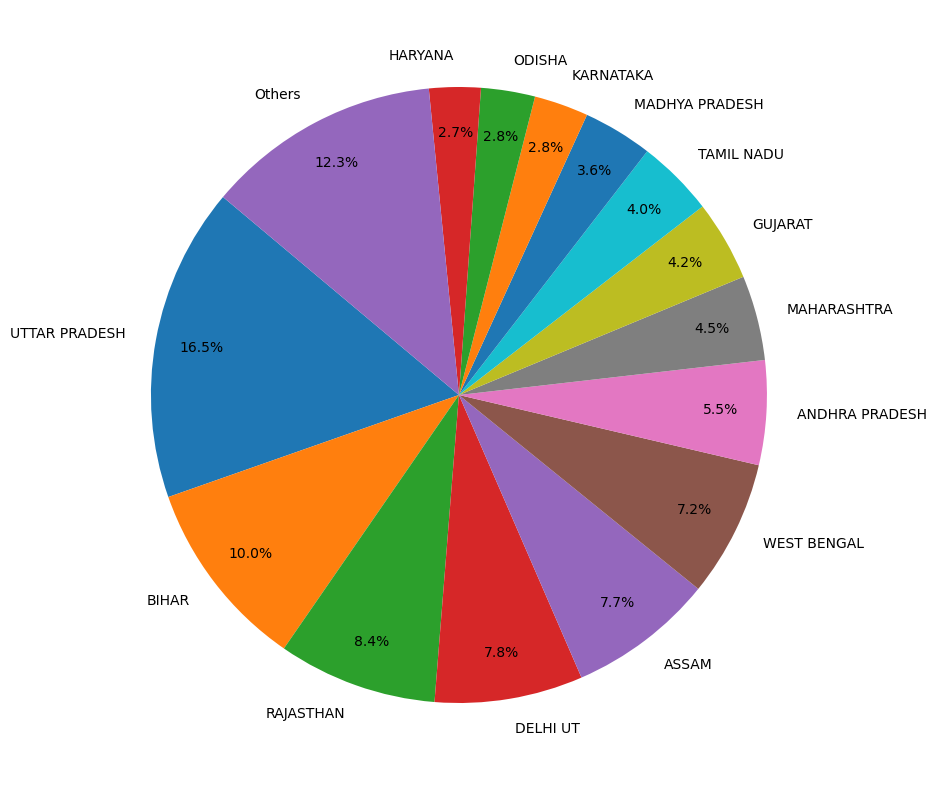

In [14]:
# plotting the data points in 2D
plt.figure(figsize=(10,10))
year_wise.plot(kind='line',marker='o',color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
state_wise.plot(kind='barh',color='skyblue')
plt.xlabel('Number of Victims')
plt.ylabel('State/UT')
plt.show()

plt.figure(figsize=(10,10))
state_wise_other.plot(kind='pie',autopct='%1.1f%%',startangle=140,pctdistance=0.85)
plt.ylabel('')
plt.show()

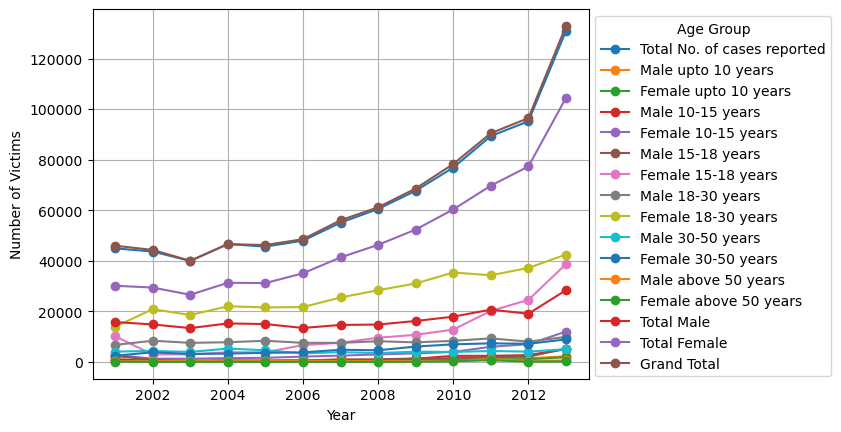

In [16]:
# Making a new column 'Yearly_Total' by summing all columns for each year
yearly_totals = KA_data.groupby('YEAR').sum(numeric_only=True)
# print(yearly_totals.head())
yearly_totals.plot(kind='line',marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))
# plt.tight_layout()
plt.show()